# OLS Regression with single feature 

In [34]:
#importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [38]:
# Scikit learn implements ordinary least squares regression in the LinearRegression class, we do the same
def ols(x,y):
    #taking the len of x which gives the number of samples
    n=len(x)
    
    #taking mean
    x_mean,y_mean=np.mean(x),np.mean(y)
    
    #finding the numerator and denominator values for b1
    ss_xy=np.sum(y*x)-n*x_mean*y_mean
    ss_xx=np.sum(x*x)-n*x_mean*x_mean
    
    b1=ss_xy/ss_xx
    
    #Now that we have b1, we can find b0
    b0=y_mean-b1*x_mean
    
    return b0,b1

    
    

In [41]:
#to plot the best fit line 
def plot_regression_line(x,y,b):
    plt.scatter(x,y,s=30)
    y_pred=b[1]*x+b[0]
    plt.plot(x,y_pred)
    plt.show()

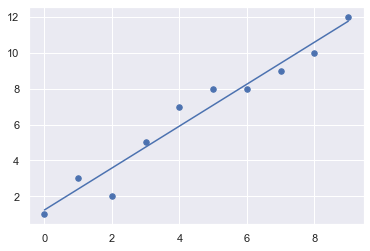

In [42]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) 
y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])
b=ols(x,y)
plot_regression_line(x,y,b)

# OLS Regression for Multiple feature

In [168]:
#importing data
data=pd.read_csv(r"C:\Users\Ishan\Documents\Python Scripts\Datasets\BostonHousing.csv")
X=data.iloc[:,:-1]
y=data.iloc[:,-1]
X=np.array(X)

<hr>
This time, we will try to do this using classes and objects
<hr>

In [169]:
class OLS(object):
    
    def __init__(self):
        self.coeff=[]
    #fit function for applying our model to the data
    def fit(self,X,y):
        if len(X.shape)==1: X=self._reshape_x(X)
        X=self.add_one_column(X)
        self.coeff=np.linalg.inv(X.transpose().dot(X)).dot(X.transpose()).dot(y)
    #converting a 1D array in 2D
    def _reshape_x(self,X):
        return X.reshape(-1,1)
    #adding first column x0=1
    def add_one_column(self,X):
        ones=np.ones(shape=X.shape[0]).reshape(-1,1)
        return np.concatenate((ones,X),1)
    # prediction for new/test data
    def predict(self,entry):
        b0=self.coeff[0]
        other_betas=self.coeff[1:]
        prediction=b0
        
        for xi,bi in zip(entry,other_betas): prediction+=(bi*xi)
        return prediction
        
        
    

In [145]:
#creating an instance of our OLS class and fitting the boston housing data to it
model=OLS()
model.fit(X,y)

In [146]:
#model coeffeciants for each feature column
model.coeff

array([ 3.64594884e+01, -1.08011358e-01,  4.64204584e-02,  2.05586264e-02,
        2.68673382e+00, -1.77666112e+01,  3.80986521e+00,  6.92224640e-04,
       -1.47556685e+00,  3.06049479e-01, -1.23345939e-02, -9.52747232e-01,
        9.31168327e-03, -5.24758378e-01])

NOTE: We should create a test set for checking our model performance but since that is not the main topic here, and hence we have not divided the dataset into train and test sets

In [161]:
#prediction for test data
model.predict(X[0])


30.00384337701705

In [164]:
y_pred=[]
for row in X:
    y_pred.append(model.predict(row))


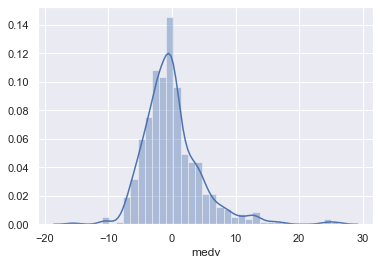

In [170]:

sns.distplot(y-y_pred)

# Refrences

- https://www.geeksforgeeks.org/linear-regression-python-implementation/
- https://towardsdatascience.com/multiple-linear-regression-from-scratch-in-numpy-36a3e8ac8014#:~:text=Linear%20regression%20is%20probably%20the,of%2Dthe%2Dbox%20solution.